The Gradient Descent estimated value for beta is: [ 2.93315441 -3.40275585]
The true value for beta is: [ 3 10]


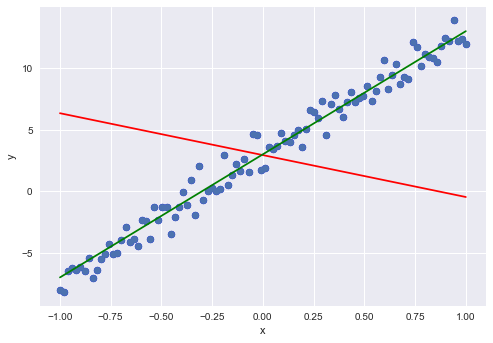

In [1]:
"""
Importing packages
"""
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

"""
Defining values
"""
debug = False
betalistshort = True
beta = np.random.normal(0,1,2) #initialize beta
alpha = 0.001
tol = 1e-7 #tolerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1
betalist = [beta]
count = 1e3
c=0



"""
Defining functions
"""
# Define the function for our linear model
def model(param,x1):
    return np.array(np.matmul(param,x1))

# Define the function for our loss function
def loss_func(param, x1, y):
    yhat = model(param, x1)
    add = 0
    x = y-yhat
    for i in range(len(x)):
        x[i] = x[i]**2
    return np.sum(x)/x.shape[0]

def hessian(x):
    a = np.mean(x)
    t = []
    for i in x:
        t.append(i**2)
    b = np.mean(np.array(t))
    return np.array([[2,2*a],[2*a,2*b]])
def lossgradient(beta, x1):
    yhat = model(beta, x1)
    o = y-yhat
    a = np.sum(o)/o.shape[0]
    g = np.ones(o.shape)
    for i in range(len(g)):
        g[i] = x1[1][i]*o[i]
    b = np.sum(g)/g.shape[0]
    return np.array([[-2*a],[-2*b]])
"""
Sample initializer
"""
N = 100 #sample size

true_beta = np.array([3,10])
x = np.linspace(-1,1, N)
x1 = np.vstack([np.ones(x.shape), x])

eps = np.random.normal(0,1,N)

y = np.matmul(true_beta, x1) + eps

plt.scatter(x,y,c='b')






"""
Gradient Descent algorithm
"""
while delta > tol:
    
    delta_beta = np.transpose(alpha*lossgradient(betalist[-1], x1))
    new_beta=betalist[-1]-delta_beta
    betalist.append(new_beta)
    loss1 = loss_func(betalist[-1],x1,y)
    loss2 = loss_func(betalist[-2],x1,y)
    delta = np.abs(loss1-loss2)
    c += 1
    if count < c: break
if count < c: raise RuntimeError('Loop ran for too long')
new_beta = new_beta[0]







"""
Visualizing results
"""
print('The Gradient Descent estimated value for beta is:', new_beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(new_beta,x1)
y_pred1 = np.matmul(true_beta,x1)
x = x.reshape(y_pred.shape)
plt.plot(x, y_pred, 'r')
plt.plot(x, y_pred1, 'g')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
